# Number Identification NN

In [1]:
#@title Command Center
HIDDEN_UNITS = 20 # @param {type:"integer"}
HIDDEN_LAYERS = 2 # @param {type:"integer"}
LEARNING_RATE = 0.01 # @param {type:"number"}
TESTING_SAMPLE_RATIO = 0.2 # @param {type:"number"}

#Settings

## 1.Set the data ready to bite.

In [2]:
#@title Load Modules
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import requests
from pathlib import Path
try:
  import idx2numpy
except Exception as e:
  !pip install -q idx2numpy
  import idx2numpy
from PIL import Image
from torch import nn
from sklearn.model_selection import train_test_split
import gzip
import numpy as np
try:
  import torchmetrics
except Exception as e:
  !pip install -q torchmetrics
  import torchmetrics
#trainset = torchvision.datasets.MNIST(root=".",train=True, download=True, transform=None)
#testset = torchvision.datasets.MNIST(root=".",train=False, download=True, transform=None)

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.2/840.2 kB 4.9 MB/s eta 0:00:00


In [ ]:
#@title Download datasets
#Create data folders
DATA_FOLDER = Path("Data")
DATA_FOLDER.mkdir(parents=True,exist_ok=True)

#Raw images folder
RAW_FOLDER = Path("Data/Raw_Images")
RAW_FOLDER.mkdir(parents=True,exist_ok=True)

#Downloading traing and testing sets:
link_names ={"training_images":"http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz",
             "training_labels":"http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz",
             "test_images":"http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz",
             "test_labels":"http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz"}
for sets in zip(link_names,link_names.values()):
  if Path("Data/Raw_Images/"+sets[0]).is_file():
    print(f"{sets[0]} was already downloaded.")
  else:
    print(f"Downloading {sets[0]}...Done")
    request =requests.get(sets[1])
    with open(f"Data/Raw_Images/{sets[0]}","wb") as f:
      f.write(request.content)

# Create Processed data folder
PROCESSED_FOLDER = Path("Data/Processed_Images")
PROCESSED_FOLDER.mkdir(parents=True,exist_ok=True)
#decompresor
def decompress_and_convert(file_path):
    with gzip.open(file_path, 'rb') as f:
        return idx2numpy.convert_from_file(f)
#idx3=images
train_images_path = Path("/content/Data/Raw_Images/training_images")
test_images_path = Path("/content/Data/Raw_Images/test_images")
train_label_path = Path("/content/Data/Raw_Images/training_labels")
test_label_path = Path("/content/Data/Raw_Images/test_labels")
#Load idx3 into Numpy array
train_images = decompress_and_convert(train_images_path)
test_images = decompress_and_convert(test_images_path)
train_labels = decompress_and_convert(train_label_path)
test_labels = decompress_and_convert(test_label_path)
images = np.vstack((train_images,test_images))
labels = np.hstack((train_labels,test_labels))

if any(PROCESSED_FOLDER.iterdir()):
  print("Fulled Processed_Images.")
else:
  for i, image_data in enumerate(images):
    image = Image.fromarray(image_data, 'L')  # 'L' mode for grayscale images
    image_path = PROCESSED_FOLDER / f'image_{i}.png'
    image.save(image_path)
  print("Fulling the Processed_Images...Done")
if Path("Data/Processed_labels.txt").is_file():
  print("There exists a Processed_labels.txt")
else:
  with open("Data/Processed_labels.txt", 'w') as file:
      # Write text to the file
      for i,label in enumerate(labels):

          file.write(f"Image_number_{i} Label: {label}\n--------------------------------------\n")
      print("Creating a Processed_labels.txt...Done")

if Path("Data.zip").is_file():
  print("A zip file of the Data folder was already created.")
else:
  print("Creating zip file of Data folder...Done")
  !zip -r -q Data.zip Data

#Delete folder
#!rm -rf Data
#Download folder
#!zip -r Data.zip Data/
#images[0]

training_images was already downloaded.
training_labels was already downloaded.
test_images was already downloaded.
test_labels was already downloaded.
Fulled Processed_Images.
There exists a Processed_labels.txt
A zip file of the Data folder was already created.


In [ ]:
#@title Ajust the data to a particular format
"""from IPython.display import display, clear_output
import ipywidgets as widgets
import io
from PIL import Image
import torch
import torchvision.transforms as transforms
from torchvision.transforms.functional import adjust_contrast
from torchvision.transforms.functional import to_pil_image


# Assuming `device` is defined as your target device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load your pre-trained MNIST model
# Assuming `model` is your trained MNIST model
# model = ...

# MNIST normalization transform
mnist_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # Convert to grayscale
    transforms.ToTensor(),  # Convert to tensor first
    #transforms.Lambda(lambda img: 1 - img),  # Invert colors
    transforms.Resize((28, 28),antialias=True),  # Resize to MNIST dimensions
    transforms.Lambda(lambda img: adjust_contrast(img, contrast_factor=400.0)),  # Adjust contrast
    transforms.CenterCrop((28, 28)),  # Center crop to 28x28
    transforms.Normalize((0.5,), (0.5,))  # Normalize to the MNIST range
])


images_ajusted=[]
for image in images:
  image_ajusted = mnist_transform(to_pil_image(image)).to(device)
  images_ajusted.append(image_ajusted)
#images_ajusted = torch.tensor(images_ajusted)
#images_ajusted.shape
images = torch.vstack(images_ajusted)
images.shape
"""
print("Not Active")

Not Active


In [ ]:

#@title Split data and make tensors
train_images,test_images,train_lables,test_lables = train_test_split(images.reshape(70000,784),
                                                                     labels,
                                                                     random_state=55,
                                                                     test_size=TESTING_SAMPLE_RATIO)

train_images_tensor = torch.Tensor(train_images).type(torch.float)
test_images_tensor = torch.Tensor(test_images).type(torch.float)
train_lables_tensor = torch.Tensor(train_lables).type(torch.int64)
test_lables_tensor = torch.Tensor(test_lables).type(torch.int64)


## 2.Construct the model.

In [ ]:
#@title Device agnostic
# 1. Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
train_images_tensor = train_images_tensor.to(device)
test_images_tensor = test_images_tensor.to(device)
train_lables_tensor = train_lables_tensor.to(device)
test_lables_tensor = test_lables_tensor.to(device)

In [ ]:
#@title Model
# device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
# Multiclass model
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8,hidden_layers=2):

    super().__init__()
    self.layers = []
    # Input layer
    self.layers.append(nn.Linear(input_features, hidden_units))
    #self.layers.append(nn.ReLU())
    # Hidden layers
    for _ in range(hidden_layers-1):
        self.layers.append(nn.Linear(hidden_units, hidden_units))
        #self.layers.append(nn.ReLU())

    # Output layer
    self.layers.append(nn.Linear(hidden_units, output_features))
    self.linear_layer_stack = nn.Sequential(*self.layers)
  def forward(self,x):
    return self.linear_layer_stack(x)
# Create instance of the model and send it to the device


model_0 = BlobModel(input_features=784,output_features=10,hidden_units=HIDDEN_UNITS,hidden_layers=HIDDEN_LAYERS).to(device)

In [ ]:
#@title Loss and Optimizer  + Metrics
#set loss
loss_fn = nn.CrossEntropyLoss()
#set optimizer
optimizer = torch.optim.Adam(params=model_0.parameters(),
                            lr=LEARNING_RATE)
# proporcion of correct predictions
accuracy_fn = torchmetrics.Accuracy(task="multiclass",num_classes=10).to(device)
# proporcion of predicted positives that are actually positives:  "Out of all the instances the model classified as positive, how many were truly positive?"
precision_fn = torchmetrics.Precision(task="multiclass",num_classes=10).to(device)
# proporcion of actual positives that are correctly predicted: "Out of all the truly positive instances in the data, how many did the model correctly identify?
recall_fn = torchmetrics.Recall(task="multiclass",num_classes=10).to(device)
# f1: Combines precision and accuracy. Closer to 1 is better
f1_fn = torchmetrics.F1Score(task="multiclass",num_classes=10).to(device)



# Model Effects

In [ ]:
#@title Training and Testing Loop
torch.autograd.set_detect_anomaly(True)
#Set seeds
torch.manual_seed(44)
torch.cuda.manual_seed(44)
#Number of epochs
epochs = 1650  # @param {type:"slider", min:0, max:10000, step:10}

#Loop through epochs
for epoch in range(epochs):
  ###Training
  #1. Forward Pass
  output_logits = model_0(train_images_tensor)

  output_preds = torch.softmax(output_logits,dim=1).argmax(dim=1)
  #2. Loss and A
  loss = loss_fn(output_logits,train_lables_tensor)
  accuracy = accuracy_fn(output_preds,train_lables_tensor)*100
  precision = accuracy_fn(output_preds,train_lables_tensor)*100
  recall = recall_fn(output_preds,train_lables_tensor)*100
  f1 = f1_fn(output_preds,train_lables_tensor)
  #3. Optimizer zero grad
  optimizer.zero_grad()
  #4. Loss backwards, i.e., backpropagation=calculate gradient
  loss.backward()
  #5. Optimizer step
  optimizer.step()

  ### Testing
  model_0.eval()
  with torch.inference_mode():
    #1. Forward pass
    test_output_logits = model_0(test_images_tensor)
    test_output_preds = torch.softmax(test_output_logits,dim=1).argmax(dim=1)
    #2. Calculate the metrics for the test
    test_loss = loss_fn(test_output_logits,test_lables_tensor)
    test_accuracy = accuracy_fn(test_output_preds,test_lables_tensor)*100
    test_precision = accuracy_fn(test_output_preds,test_lables_tensor)*100
    test_recall = recall_fn(test_output_preds,test_lables_tensor)*100
    test_f1 = f1_fn(test_output_preds,test_lables_tensor)
  if epoch % (epochs/4)==0 or epoch+1==epochs:
    print(f"Epochs: {epoch+1} | Loss: {loss:5f}, Acc: {accuracy:.2f}%, Pre: {precision:.2f}%, Recall: {recall:.2f}%, F1: {f1:.4}")
    print(f"            | TestLoss: {test_loss:5f}, TestAcc: {test_accuracy:.2f}%, TestPre: {test_precision:.2f}%, TestRecall: {test_recall:.2f}%, TestF1: {test_f1:.4}")
    print(f"--------------------------------------------------------------------------------------------------------")





NameError: ignored

In [ ]:
#@title Prediction VS Reality with numbers dataset

from IPython.display import display, HTML, clear_output
import io
from PIL import Image
import ipywidgets as widgets
import numpy as np
import torch

# Initialize image_array_list as an empty list globally
image_array_list = []

# Function to handle the uploaded images and display them
def on_upload_change(change):
    global image_array_list  # Declare image_array_list as a global variable
    clear_output(wait=True)
    uploaded_files = upload_button.value
    if uploaded_files:
        # Iterate through the uploaded files
        for file_name, file_info in uploaded_files.items():
            image = Image.open(io.BytesIO(file_info['content']))
            # Convert the image to a NumPy array
            image_array = np.array(image)
            image_array_list.append(image_array)
            # Display the image
    else:
        print("No files uploaded.")

# Create a file upload button
upload_button = widgets.FileUpload(description="Upload Images", accept=".jpg,.jpeg,.png", multiple=True)
upload_button.observe(on_upload_change, names='value')

# Display the file upload button
display(upload_button)

# Create a button for comparison
compare_button = widgets.Button(description="Compare Images")

# Function to handle the comparison
def on_compare_button_click(b):
    clear_output(wait=True)
    print("Reality:")
    # Display all uploaded images
    num_images = len(image_array_list)
    figsizes=[(1/2,1/2)]*len(image_array_list)
    fig, axes = plt.subplots(1, num_images,figsize=(sum(figsizes[i][0] for i in range(num_images)), max(figsizes[i][1] for i in range(num_images))))

    # Display all uploaded images side by side
    for i, image_array in enumerate(image_array_list):
        axes[i].imshow(image_array, cmap='gray')
        axes[i].axis('off')

    plt.show()
    # Perform predictions for each image
    print("\nPrediction:")
    predictions=[]
    for image_array in image_array_list:
        image_array_tensor = torch.Tensor(image_array.reshape(784)).type(torch.float).to(device)
        with torch.inference_mode():
            prediction_logits = model_0(image_array_tensor)
        prediction_probs = torch.softmax(prediction_logits, dim=0)
        prediction_pred = prediction_probs.argmax().item()
        predictions.append(prediction_pred)
    print(f"{predictions}")

# Assign the function to the button click event
compare_button.on_click(on_compare_button_click)

# Display the compare button
display(compare_button)


FileUpload(value={}, accept='.jpg,.jpeg,.png', description='Upload Images', multiple=True)

Button(description='Compare Images', style=ButtonStyle())

In [ ]:
#@title Predictions vs Reality with custom made numbers (write them centered on tha image, with clear background and darker written number). The results are poor..
from IPython.display import display, clear_output
import ipywidgets as widgets
import io
from PIL import Image
import torch
import torchvision.transforms as transforms
from torchvision.transforms.functional import adjust_contrast

# Assuming `device` is defined as your target device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load your pre-trained MNIST model
# Assuming `model` is your trained MNIST model
# model = ...

# MNIST normalization transform
mnist_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # Convert to grayscale
    transforms.ToTensor(),  # Convert to tensor first
    transforms.Lambda(lambda img: 1 - img),  # Invert colors
    #transforms.Lambda(lambda img: 1 - img),  # Invert colors
    transforms.Resize((28, 28),antialias=True),  # Resize to MNIST dimensions
    transforms.Lambda(lambda img: adjust_contrast(img, contrast_factor=400.0)),  # Adjust contrast
    transforms.CenterCrop((28, 28)),  # Center crop to 28x28
    transforms.Normalize((0.5,), (0.5,))  # Normalize to the MNIST range
])

# Initialize image_array_list as an empty list globally
image_array_list = []

# Function to handle the uploaded image and display it
def on_upload_change(change):
    global image_array_list
    clear_output(wait=True)
    uploaded_files = upload_button.value
    if uploaded_files:
        for file_key in uploaded_files.keys():
            image = Image.open(io.BytesIO(uploaded_files[file_key]['content']))

            # Apply the MNIST normalization transform and convert to tensor
            image_array = mnist_transform(image).squeeze().to(device)

            # Add the normalized image to the list
            image_array_list.append(image_array)
    else:
        print("No files uploaded.")

# Function to compare reality and predictions
def on_compare_button_click(b):
    clear_output(wait=True)
    print("Reality (ajusted to fit the model training data):")

    # Display all uploaded images side by side
    num_images = len(image_array_list)
    figsizes = [(1/2, 1/2)] * num_images
    fig, axes = plt.subplots(1, num_images, figsize=(sum(figsizes[i][0] for i in range(num_images)), max(figsizes[i][1] for i in range(num_images))))

    for i, image_array in enumerate(image_array_list):
        axes[i].imshow(image_array.cpu().numpy().squeeze(), cmap='gray')  # Convert to NumPy array and squeeze
        axes[i].axis('off')
    plt.show()

    # Perform predictions for each image
    print("\nPrediction:")
    predictions = []
    for image_array in image_array_list:
        image_array_tensor = image_array.view(1, -1).squeeze().to(device)
        with torch.inference_mode():
            prediction_logits = model_0(image_array_tensor)
        prediction_probs = torch.softmax(prediction_logits, dim=0)
        prediction_pred = prediction_probs.argmax(dim=0).item()
        predictions.append(prediction_pred)
    print(f"{predictions}")

# Create a file upload button
upload_button = widgets.FileUpload(description="Upload Image", accept=".jpg,.jpeg,.png", multiple=True)
upload_button.observe(on_upload_change, names='value')

# Create a compare button
compare_button = widgets.Button(description="Compare Images")
compare_button.on_click(on_compare_button_click)

# Display the file upload button and compare button
display(upload_button)
display(compare_button)

KeyboardInterrupt: ignored

# CNN Model

In [14]:
#@title Command Center
#@markdown ##Dataset
TESTING_SAMPLE_RATIO = 0.4 # @param {type:"number"}
BATCH_SIZE=60 # @param {type:"integer"}

#@markdown ##Model
HIDDEN_UNITS = 20 # @param {type:"integer"}
LEARNING_RATE = 0.01 # @param {type:"number"}
EPOCHS = 2 # @param {type:"slider", min:0, max:10, step:1}

#Settings

## 1.Set the data ready to bite.

In [22]:
#@title Load Modules
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import requests
from pathlib import Path
try:
  import idx2numpy
except Exception as e:
  !pip install -q idx2numpy
  import idx2numpy
from PIL import Image
from torch import nn
from sklearn.model_selection import train_test_split
import gzip
import numpy as np
try:
  import torchmetrics
except Exception as e:
  !pip install -q torchmetrics
  import torchmetrics
#trainset = torchvision.datasets.MNIST(root=".",train=True, download=True, transform=None)
#testset = torchvision.datasets.MNIST(root=".",train=False, download=True, transform=None)

In [23]:
#@title Download datasets
#Create data folders
DATA_FOLDER = Path("Data")
DATA_FOLDER.mkdir(parents=True,exist_ok=True)

#Raw images folder
RAW_FOLDER = Path("Data/Raw_Images")
RAW_FOLDER.mkdir(parents=True,exist_ok=True)

#Downloading traing and testing sets:
link_names ={"training_images":"http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz",
             "training_labels":"http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz",
             "test_images":"http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz",
             "test_labels":"http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz"}
for sets in zip(link_names,link_names.values()):
  if Path("Data/Raw_Images/"+sets[0]).is_file():
    print(f"{sets[0]} was already downloaded.")
  else:
    print(f"Downloading {sets[0]}...Done")
    request =requests.get(sets[1])
    with open(f"Data/Raw_Images/{sets[0]}","wb") as f:
      f.write(request.content)

# Create Processed data folder
PROCESSED_FOLDER = Path("Data/Processed_Images")
PROCESSED_FOLDER.mkdir(parents=True,exist_ok=True)
#decompresor
def decompress_and_convert(file_path):
    with gzip.open(file_path, 'rb') as f:
        return idx2numpy.convert_from_file(f)
#idx3=images
train_images_path = Path("/content/Data/Raw_Images/training_images")
test_images_path = Path("/content/Data/Raw_Images/test_images")
train_label_path = Path("/content/Data/Raw_Images/training_labels")
test_label_path = Path("/content/Data/Raw_Images/test_labels")
#Load idx3 into Numpy array
train_images = decompress_and_convert(train_images_path)
test_images = decompress_and_convert(test_images_path)
train_labels = decompress_and_convert(train_label_path)
test_labels = decompress_and_convert(test_label_path)
images = np.vstack((train_images,test_images))
labels = np.hstack((train_labels,test_labels))

if any(PROCESSED_FOLDER.iterdir()):
  print("Fulled Processed_Images.")
else:
  for i, image_data in enumerate(images):
    image = Image.fromarray(image_data, 'L')  # 'L' mode for grayscale images
    image_path = PROCESSED_FOLDER / f'image_{i}.png'
    image.save(image_path)
  print("Fulling the Processed_Images...Done")
if Path("Data/Processed_labels.txt").is_file():
  print("There exists a Processed_labels.txt")
else:
  with open("Data/Processed_labels.txt", 'w') as file:
      # Write text to the file
      for i,label in enumerate(labels):

          file.write(f"Image_number_{i} Label: {label}\n--------------------------------------\n")
      print("Creating a Processed_labels.txt...Done")

if Path("Data.zip").is_file():
  print("A zip file of the Data folder was already created.")
else:
  print("Creating zip file of Data folder...Done")
  !zip -r -q Data.zip Data

#Delete folder
#!rm -rf Data
#Download folder
#!zip -r Data.zip Data/
#images[0]

training_images was already downloaded.
training_labels was already downloaded.
test_images was already downloaded.
test_labels was already downloaded.
Fulled Processed_Images.
There exists a Processed_labels.txt
A zip file of the Data folder was already created.


In [24]:
#@title Ajust the data to a particular format
"""from IPython.display import display, clear_output
import ipywidgets as widgets
import io
from PIL import Image
import torch
import torchvision.transforms as transforms
from torchvision.transforms.functional import adjust_contrast
from torchvision.transforms.functional import to_pil_image


# Assuming `device` is defined as your target device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load your pre-trained MNIST model
# Assuming `model` is your trained MNIST model
# model = ...

# MNIST normalization transform
mnist_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # Convert to grayscale
    transforms.ToTensor(),  # Convert to tensor first
    #transforms.Lambda(lambda img: 1 - img),  # Invert colors
    transforms.Resize((28, 28),antialias=True),  # Resize to MNIST dimensions
    transforms.Lambda(lambda img: adjust_contrast(img, contrast_factor=400.0)),  # Adjust contrast
    transforms.CenterCrop((28, 28)),  # Center crop to 28x28
    transforms.Normalize((0.5,), (0.5,))  # Normalize to the MNIST range
])


images_ajusted=[]
for image in images:
  image_ajusted = mnist_transform(to_pil_image(image)).to(device)
  images_ajusted.append(image_ajusted)
#images_ajusted = torch.tensor(images_ajusted)
#images_ajusted.shape
images = torch.vstack(images_ajusted)
images.shape
"""
print("Not Active")

Not Active


In [25]:

#@title Split data and make tensors
train_images,test_images,train_lables,test_lables = train_test_split(images,
                                                                     labels,
                                                                     random_state=55,
                                                                     test_size=TESTING_SAMPLE_RATIO)

train_images_tensor = torch.Tensor(train_images).type(torch.float)
test_images_tensor = torch.Tensor(test_images).type(torch.float)
train_lables_tensor = torch.Tensor(train_lables).type(torch.int64)
test_lables_tensor = torch.Tensor(test_lables).type(torch.int64)


In [26]:
#@title Solving some mess...
import torch
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):
    def __init__(self, images, labels):
        self.images = torch.Tensor(images).type(torch.float).unsqueeze(dim=1)
        self.labels = torch.Tensor(labels).type(torch.int64)

    def __len__(self):
        return len(self.images)

    def __getitem__(self, index):
        return self.images[index], self.labels[index]

# Example usage:
train_dataset = CustomDataset(train_images_tensor, train_lables_tensor)
test_dataset = CustomDataset(test_images_tensor, test_lables_tensor)


# Specify batch size for DataLoader
batch_size = BATCH_SIZE

# Create DataLoader instances
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


## 2.Construct the model.

In [27]:
#@title Device agnostic
# 1. Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

In [28]:
#@title Build ModelV1: Build CNN Really!
#INPUT_SHAPE=784
#OUTPUT_SHAPE=len(labels.unique())
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape,
               hidden_units,
               output_shape,
               ):

    super().__init__()
    self.con_block_1=nn.Sequential(
        nn.Conv2d(in_channels=input_shape, # This is basically igual to the number of colour channels in our data, since its the first layers. Layer,it will equal the number of filters of the previous convolution layer
                  out_channels=hidden_units, # this will the number of filters and the subsquent number of distinct activation maps the convolution layer has.
                  kernel_size=3, #The filter tensor is of shape (in_channels,3,3), in this case, (1,3,3) i guess...
                  stride=1, #The convolution jumps from 1 in 1
                  padding=1, #Add a layer of zeros one layer outside our image pixel
                  ),
        nn.ReLU(), # Just an activation function
        nn.Conv2d(in_channels=hidden_units, # It is equal to the number of filters of the previous convolution layer
                  out_channels=hidden_units, # this will the number of filters and the subsquent number of distinct activation maps the created convolution layer will have.
                  kernel_size=3, #The filter tensor is of shape (in_channels,3,3), in this case, (1,3,3) i guess...
                  stride=1, #The convolution jumps from 1 in 1
                  padding=1, #Add a layer of zeros one layer outside our image pixel
                  ),
        nn.ReLU(), #Just an activation function
        nn.MaxPool2d(kernel_size=2) # Basically, reduce the dimensionality of the second created Conv2d convolution layer via taking the maximum over a sliding square over the height and width of the previous tensor.
    )
    self.con_block_2=nn.Sequential(
        nn.Conv2d(in_channels=hidden_units, # This is basically igual to the number of colour channels in our data, since its the first layers. Layer,it will equal the number of filters of the previous convolution layer
                  out_channels=hidden_units, # this will the number of filters and the subsquent number of distinct activation maps the convolution layer has.
                  kernel_size=3, #The filter tensor is of shape (in_channels,3,3), in this case, (1,3,3) i guess...
                  stride=1, #The convolution jumps from 1 in 1
                  padding=1, #Add a layer of zeros one layer outside our image pixel
                  ),
        nn.ReLU(), # Just an activation function
        nn.Conv2d(in_channels=hidden_units, # It is equal to the number of filters of the previous convolution layer
                  out_channels=hidden_units, # this will the number of filters and the subsquent number of distinct activation maps the created convolution layer will have.
                  kernel_size=3, #The filter tensor is of shape (in_channels,3,3), in this case, (1,3,3) i guess...
                  stride=1, #The convolution jumps from 1 in 1
                  padding=1, #Add a layer of zeros one layer outside our image pixel
                  ),
        nn.ReLU(), #Just an activation function
        nn.MaxPool2d(kernel_size=2) # Basically, reduce the dimensionality of the second created Conv2d convolution layer via taking the maximum over a sliding square over the height and width of the previous tensor.
    )

    #self.classifier = nn.Sequential(
    #    nn.AdaptiveAvgPool2d([1,1]),
    #    nn.Flatten(),
    #    nn.Linear(hidden_units,output_shape))

    self.classifier=nn.Sequential(
      nn.Linear(7*7*hidden_units,output_shape)
  )
  def forward(self,x):
    s=len(x)
    x = self.con_block_1(x)
    x = self.con_block_2(x)
    x = x.reshape(s,7*7*HIDDEN_UNITS)
    x = self.classifier(x)
    return x

torch.manual_seed(2121)
model_1 = FashionMNISTModelV1(input_shape=1,hidden_units=HIDDEN_UNITS,output_shape=10).to(device) # input-> Number of color channels of data. hidde_units=number of filters, output_shape=number of categories


# Model Effects

In [29]:
#@title Test Model
%%time

def multiclass_classification_training(model,train_dataloader,test_dataloader,learning_rate,out_shape=10,epochs=2,batches=0):
  # Set up metrics
  from tqdm.auto import tqdm
  import torch
  from torch import nn
  #set loss
  loss_fn = nn.CrossEntropyLoss()
  #set optimizer
  optimizer = torch.optim.SGD(params=model.parameters(),
                              lr=learning_rate)
  # proporcion of correct predictions
  accuracy_fn = torchmetrics.Accuracy(task="multiclass",num_classes=out_shape).to(device)
  # proporcion of predicted positives that are actually positives:  "Out of all the instances the model classified as positive, how many were truly positive?"
  precision_fn = torchmetrics.Precision(task="multiclass",num_classes=out_shape).to(device)
  # proporcion of actual positives that are correctly predicted: "Out of all the truly positive instances in the data, how many did the model correctly identify?
  recall_fn = torchmetrics.Recall(task="multiclass",num_classes=out_shape).to(device)
  # f1: Combines precision and accuracy. Closer to 1 is better
  f1_fn = torchmetrics.F1Score(task="multiclass",num_classes=out_shape).to(device)

  #@title Test Model
  # Set seeds
  torch.manual_seed(44)
  torch.cuda.manual_seed(44)


  # Loop through epochs

  for epoch in tqdm(range(epochs)):
      print(f"Epoch {epoch+1}:\n-----------------------------")
      ### Training
      model_1.train()

      # Initialize metrics for training data
      train_loss, train_accuracy, train_precision, train_recall, train_f1 = 0, 0, 0, 0, 0

      # Loop through training batches
      for batch, (X, y) in enumerate(train_dataloader):
          model_1.train()
          X=X.to(device)
          y=y.to(device)
          # 1. Forward Pass
          y_logits = model_1(X)
          y_preds = torch.softmax(y_logits, dim=1).argmax(dim=1)
          # 2. Loss and metrics for batched data
          loss = loss_fn(y_logits, y)
          train_loss += loss

          accuracy = accuracy_fn(y_preds, y) * 100
          train_accuracy += accuracy

          precision = precision_fn(y_preds, y) * 100
          train_precision += precision

          recall = recall_fn(y_preds, y) * 100
          train_recall += recall

          f1 = f1_fn(y_preds, y)
          train_f1 += f1
          batches+=1
          # 3. Optimizer zero grad
          optimizer.zero_grad()

          # 4. Loss backward, i.e., backpropagation = calculate gradient
          loss.backward()

          # 5. Optimizer step
          optimizer.step()

          # Print some output
          if batch % (len(train_dataloader)/3)== 0 or batch+1==len(train_dataloader):
              print(f"Looked at {(batch+1) * len(X)}/{len(train_dataloader.dataset)} samples")

      # Average metrics per epoch
      train_loss = train_loss/len(train_dataloader)
      train_accuracy = train_accuracy/len(train_dataloader)
      train_precision = train_precision/len(train_dataloader)
      train_recall = train_recall/len(train_dataloader)
      train_f1 = train_f1/len(train_dataloader)

      ### Testing
      test_loss, test_accuracy, test_precision, test_recall, test_f1 = 0, 0, 0, 0, 0
      model_1.eval()

      with torch.inference_mode():
          for X, y in test_dataloader:
              X=X.to(device)
              y=y.to(device)
              # 1. Forward pass
              y_logits_test = model_1(X)
              y_preds_test = torch.softmax(y_logits_test, dim=1).argmax(dim=1)

              # 2. Calculate metrics for the test
              loss_t = loss_fn(y_logits_test, y)
              test_loss += loss_t

              # Metrics by batch
              accuracy_t = accuracy_fn(y_preds_test, y) * 100
              test_accuracy += accuracy_t

              precision_t = accuracy_fn(y_preds_test, y) * 100
              test_precision += precision_t

              recall_t = recall_fn(y_preds_test, y) * 100
              test_recall += recall_t

              f1_t = f1_fn(y_preds_test, y)
              test_f1 += f1_t
      # Average metrics per epoch
      test_loss = test_loss/len(test_dataloader)
      test_accuracy = test_accuracy/len(test_dataloader)
      test_precision = test_precision/len(test_dataloader)
      test_recall = test_recall/len(test_dataloader)
      test_f1 = test_f1/len(test_dataloader)
      print(f"| Loss: {train_loss:.5f}, Acc: {train_accuracy:.2f}%, Pre: {train_precision:.2f}%, Recall: {train_recall:.2f}%, F1: {train_f1:.4}")
      print(f"| TestLoss: {test_loss:.5f}, TestAcc: {test_accuracy:.2f}%, TestPre: {test_precision:.2f}%, TestRecall: {test_recall:.2f}%, TestF1: {test_f1:.4}")
      print(f"| Number of executed batches of size {train_dataloader.batch_size}: {batches}")
      print(f"--------------------------------------------------------------------------------------------------------")

multiclass_classification_training(model=model_1,train_dataloader=train_dataloader,test_dataloader=test_dataloader,learning_rate=LEARNING_RATE,out_shape=10,epochs=EPOCHS)


  0%|          | 0/2 [00:00<?, ?it/s]

Epoch 1:
-----------------------------
Looked at 60/42000 samples
Looked at 42000/42000 samples
| Loss: 0.20811, Acc: 93.72%, Pre: 93.72%, Recall: 93.72%, F1: 0.9372
| TestLoss: 0.07756, TestAcc: 97.59%, TestPre: 97.59%, TestRecall: 97.59%, TestF1: 0.9759
| Number of executed batches of size 60: 700
--------------------------------------------------------------------------------------------------------
Epoch 2:
-----------------------------
Looked at 60/42000 samples
Looked at 42000/42000 samples
| Loss: 0.06042, Acc: 98.15%, Pre: 98.15%, Recall: 98.15%, F1: 0.9815
| TestLoss: 0.07057, TestAcc: 97.79%, TestPre: 97.79%, TestRecall: 97.79%, TestF1: 0.9779
| Number of executed batches of size 60: 1400
--------------------------------------------------------------------------------------------------------
CPU times: user 13.6 s, sys: 103 ms, total: 13.8 s
Wall time: 13.9 s


Reality:


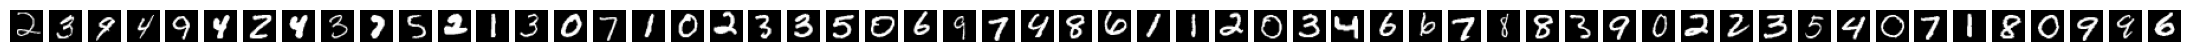


Prediction:
[2, 3, 9, 4, 9, 4, 2, 4, 3, 7, 5, 2, 1, 3, 0, 7, 1, 0, 2, 3, 3, 5, 0, 6, 9, 7, 4, 8, 6, 1, 1, 2, 0, 3, 4, 6, 6, 7, 8, 8, 3, 9, 0, 2, 2, 3, 5, 4, 0, 7, 1, 8, 0, 9, 8, 6]


In [31]:
#@title Prediction VS Reality with numbers dataset

from IPython.display import display, HTML, clear_output
import io
from PIL import Image
import ipywidgets as widgets
import numpy as np
import torch

# Initialize image_array_list as an empty list globally
image_array_list = []

# Function to handle the uploaded images and display them
def on_upload_change(change):
    global image_array_list  # Declare image_array_list as a global variable
    clear_output(wait=True)
    uploaded_files = upload_button.value
    if uploaded_files:
        # Iterate through the uploaded files
        for file_name, file_info in uploaded_files.items():
            image = Image.open(io.BytesIO(file_info['content']))
            # Convert the image to a NumPy array
            image_array = np.array(image)
            image_array_list.append(image_array)
            # Display the image
    else:
        print("No files uploaded.")

# Create a file upload button
upload_button = widgets.FileUpload(description="Upload Images", accept=".jpg,.jpeg,.png", multiple=True)
upload_button.observe(on_upload_change, names='value')

# Display the file upload button
display(upload_button)

# Create a button for comparison
compare_button = widgets.Button(description="Compare Images")

# Function to handle the comparison
def on_compare_button_click(b):
    clear_output(wait=True)
    print("Reality:")
    # Display all uploaded images
    num_images = len(image_array_list)
    if num_images == 1:
        # Handle the case of a single image separately
        plt.figure(figsize=(1/2, 1/2))
        plt.imshow(image_array_list[0], cmap='gray')
        plt.axis('off')
        plt.show()
    else:
        # Display all uploaded images side by side
        figsizes=[(1/2,1/2)]*len(image_array_list)
        fig, axes = plt.subplots(1, num_images, figsize=(sum(figsizes[i][0] for i in range(num_images)), max(figsizes[i][1] for i in range(num_images))))

        for i, image_array in enumerate(image_array_list):
            axes[i].imshow(image_array, cmap='gray')
            axes[i].axis('off')

    plt.show()
    # Perform predictions for each image
    print("\nPrediction:")
    predictions=[]
    for image_array in image_array_list:
        image_array_tensor = torch.Tensor(image_array).unsqueeze(dim=0).type(torch.float).to(device)
        with torch.inference_mode():
            prediction_logits = model_1(image_array_tensor)
        prediction_probs = torch.softmax(prediction_logits, dim=1)
        prediction_pred = prediction_probs.argmax().item()
        predictions.append(prediction_pred)
    print(f"{predictions}")

# Assign the function to the button click event
compare_button.on_click(on_compare_button_click)

# Display the compare button
display(compare_button)


Reality (ajusted to fit the model training data):


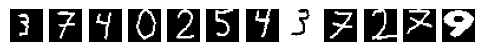


Prediction:
[3, 7, 7, 5, 2, 3, 7, 7, 7, 1, 7, 8]


In [30]:
#@title Predictions vs Reality with custom made numbers (write them centered on tha image, with clear background and darker written number). The results are poor..
from IPython.display import display, clear_output
import ipywidgets as widgets
import io
from PIL import Image
import torch
import torchvision.transforms as transforms
from torchvision.transforms.functional import adjust_contrast

# Assuming `device` is defined as your target device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load your pre-trained MNIST model
# Assuming `model` is your trained MNIST model
# model = ...

# MNIST normalization transform
mnist_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # Convert to grayscale
    transforms.ToTensor(),  # Convert to tensor first
    transforms.Lambda(lambda img: 1 - img),  # Invert colors
    #transforms.Lambda(lambda img: 1 - img),  # Invert colors
    transforms.Resize((28, 28),antialias=True),  # Resize to MNIST dimensions
    transforms.Lambda(lambda img: adjust_contrast(img, contrast_factor=400.0)),  # Adjust contrast
    transforms.CenterCrop((28, 28)),  # Center crop to 28x28
    transforms.Normalize((0.5,), (0.5,))  # Normalize to the MNIST range
])

# Initialize image_array_list as an empty list globally
image_array_list = []

# Function to handle the uploaded image and display it
def on_upload_change(change):
    global image_array_list
    clear_output(wait=True)
    uploaded_files = upload_button.value
    if uploaded_files:
        for file_key in uploaded_files.keys():
            image = Image.open(io.BytesIO(uploaded_files[file_key]['content']))

            # Apply the MNIST normalization transform and convert to tensor
            image_array = mnist_transform(image).squeeze().to(device)

            # Add the normalized image to the list
            image_array_list.append(image_array)
    else:
        print("No files uploaded.")

# Function to compare reality and predictions
def on_compare_button_click(b):
    clear_output(wait=True)
    print("Reality (ajusted to fit the model training data):")

    # Display all uploaded images side by side
    num_images = len(image_array_list)
    if num_images == 1:
        # Handle the case of a single image separately
        plt.figure(figsize=(1/2, 1/2))
        plt.imshow(image_array_list[0].cpu().numpy().squeeze(), cmap='gray')
        plt.axis('off')
        plt.show()
    else:
        # Display all uploaded images side by side
        figsizes=[(1/2,1/2)]*len(image_array_list)
        fig, axes = plt.subplots(1, num_images, figsize=(sum(figsizes[i][0] for i in range(num_images)), max(figsizes[i][1] for i in range(num_images))))

        for i, image_array in enumerate(image_array_list):
            axes[i].imshow(image_array.cpu().numpy().squeeze(), cmap='gray')
            axes[i].axis('off')

    plt.show()
    # Perform predictions for each image
    print("\nPrediction:")
    predictions = []
    for image_array in image_array_list:
        image_array_tensor = image_array.unsqueeze(dim=0).to(device)
        with torch.inference_mode():
            prediction_logits = model_1(image_array_tensor)
        prediction_probs = torch.softmax(prediction_logits, dim=1)
        prediction_pred = prediction_probs.argmax(dim=1).item()
        predictions.append(prediction_pred)
    print(f"{predictions}")

# Create a file upload button
upload_button = widgets.FileUpload(description="Upload Image", accept=".jpg,.jpeg,.png", multiple=True)
upload_button.observe(on_upload_change, names='value')

# Create a compare button
compare_button = widgets.Button(description="Compare Images")
compare_button.on_click(on_compare_button_click)

# Display the file upload button and compare button
display(upload_button)
display(compare_button)